# 302 Classification

View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
* torch: 0.1.11
* matplotlib

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1)    # reproducible

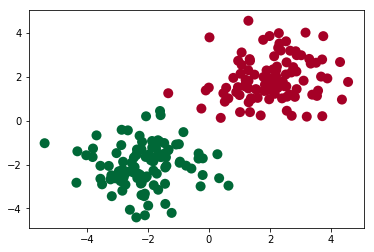

In [2]:


# make fake data
n_data = torch.ones(100, 2)
# torch.normal(mean, std): Returns a tensor of random numbers drawn from separate normal distributions
#    whose mean and standard deviation are given.
# this generate random numbers centered at 2 and have std=1
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2), same as that of n_data
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2), same as that of n_data
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, )
# torch.cat(seq, dim=0, out=None)
# Concatenates the given sequence of :attr:`seq` tensors in the given dimension.
#    All tensors must either have the same shape (except in the concatenating
#    dimension) or be empty.
# Returns the type if `dtype` is not provided, else casts this object to
#    the specified type.
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
# the result of torch.cat((y0, y1), ) is same as that of torch.cat((y0, y1), 0)
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# for cmap, check https://matplotlib.org/users/colormaps.html
# 'RdYlGn' has red for small value, yellow for medium value, green for large value
# s: The marker size in points**2.
# lw: The linewidth of the marker edges.
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [4]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [5]:
plt.ion()   # something about plotting

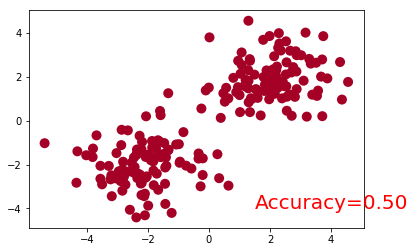

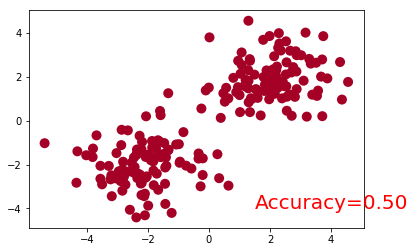

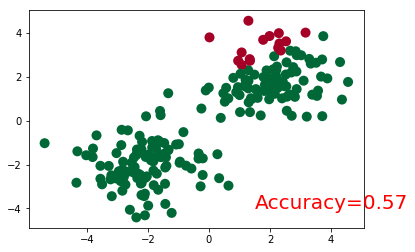

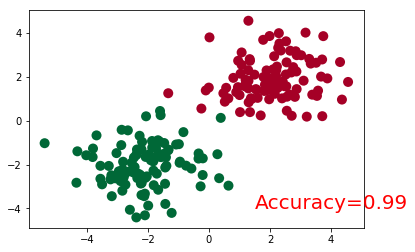

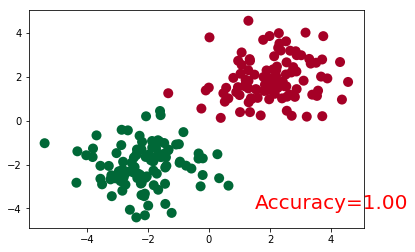

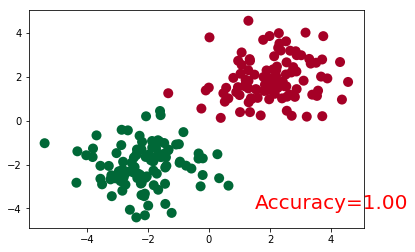

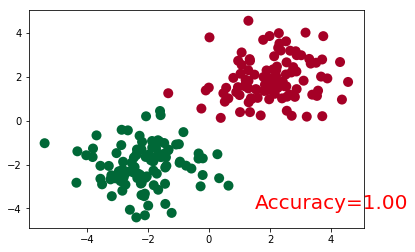

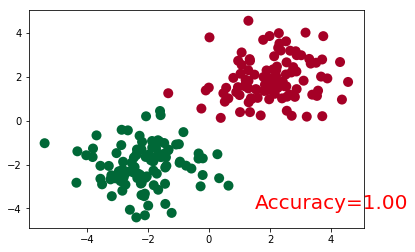

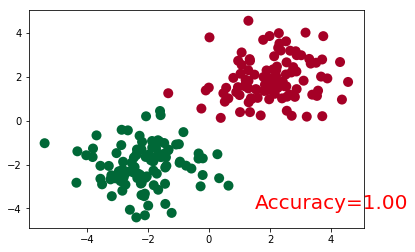

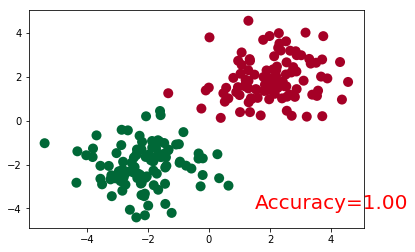

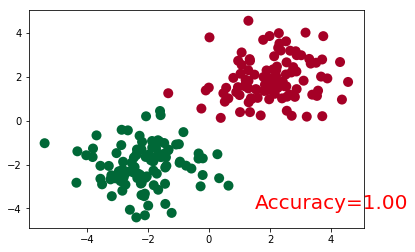

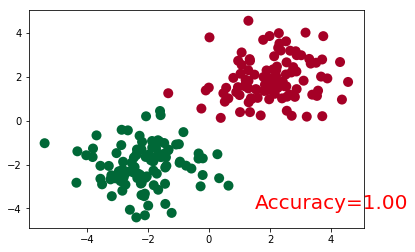

In [6]:
for t in range(100):
    out = net(x)                 # input x and predict based on x, there is negative element and some element greater than 1
    #out.shape(200,2), y.shape: (200,)
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        #add dim=1 in F.softmax to suppress the warning:
        #/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: 
        #UserWarning: Implicit dimension choice for softmax has been deprecated. 
        #Change the call to include dim=X as an argument.
        #if sys.path[0] == '':
        _, prediction = torch.max(F.softmax(out, dim=1), 1)
        # squeeze is not neccessary here, the shape of prediction.data.numpy() is (200,) already
        pred_y = prediction.data.numpy() #.squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()